## Обучение без учителя в Scikit-learn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#%config InlineBackend.figure_format = 'svg'
%matplotlib inline

### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.

Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:

n_components=2, 
learning_rate=250, 
random_state=42.

Постройте диаграмму рассеяния на этих данных.

In [2]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [3]:
boston = load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

In [5]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

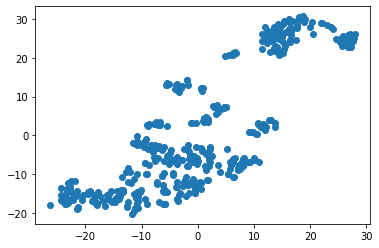

In [6]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train.

Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.

In [7]:
from sklearn.cluster import KMeans

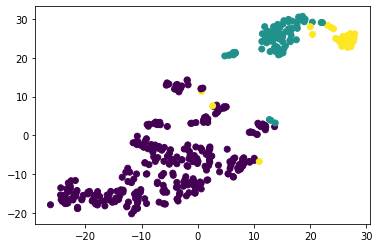

In [8]:
kmeans = KMeans(n_clusters=3, random_state=42, max_iter=100)

labels_train = kmeans.fit_predict(X_train)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

In [9]:
X_train_ext = X_train.copy()

In [10]:
X_train_ext['price'], X_train_ext['cluster_label'] = [y_train, pd.Series(labels_train, index=X_train.index)]

X_train_ext.groupby('cluster_label').agg({'price': 'mean', 'CRIM': 'mean'})

,price,CRIM
cluster_label,,
0,25.168687,0.404863
1,17.442105,11.745662
2,13.196774,14.360380


### * Задание 3
Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [11]:
labels_test = kmeans.predict(X_test)

In [12]:
X_test_ext = X_test.copy()

In [13]:
X_test_ext['price'], X_test_ext['cluster_label'] = [y_test, pd.Series(labels_test, index=X_test.index)]

X_test_ext.groupby('cluster_label').agg({'price': 'mean', 'CRIM': 'mean'})

,price,CRIM
cluster_label,,
0,23.911594,0.246421
1,17.392308,8.469302
2,12.814286,19.021666


Text(0.5, 0, 'CRIM')

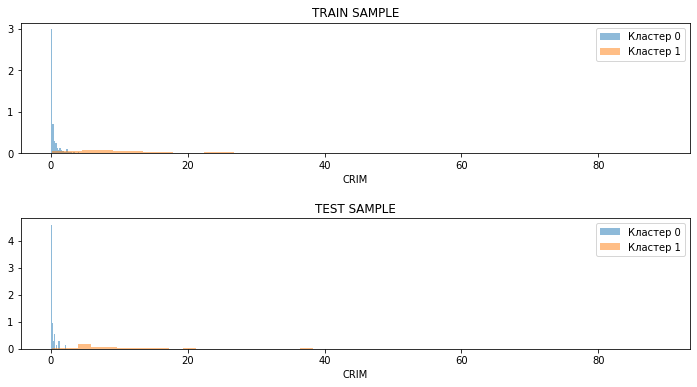

In [14]:
fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1)

fig.set_size_inches(12, 6)
fig.subplots_adjust(hspace=0.5)

ax0.hist(X_train.loc[labels_train == 0, 'CRIM'], bins=20, density=True, alpha=0.5, label='Кластер 0')
ax0.hist(X_train.loc[labels_train == 1, 'CRIM'], bins=20, density=True, alpha=0.5, label='Кластер 1')

ax0.set_title('TRAIN SAMPLE')
ax0.legend(loc="upper right")
ax0.set_xlabel('CRIM')

ax1.hist(X_test.loc[labels_test == 0, 'CRIM'], bins=20, density=True, alpha=0.5, label='Кластер 0')
ax1.hist(X_test.loc[labels_test == 1, 'CRIM'], bins=20, density=True, alpha=0.5, label='Кластер 1')

ax1.set_xlim(ax0.get_xlim())
ax1.set_title('TEST SAMPLE')
ax1.legend(loc="upper right")
ax1.set_xlabel('CRIM')

# plt.show()